In [1]:
import pandas as pd
import numpy as np

In [2]:
dftrain=pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')

In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dftest.shape

(28000, 784)

In [7]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
dftrain.shape

(42000, 785)

In [9]:
X=dftrain.iloc[:,1:]
Y=dftrain.iloc[:,0]

In [10]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [17]:
dftrain['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [18]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

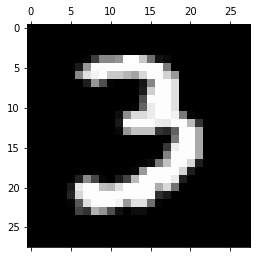

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
arr=np.array(X.iloc[9])
plt.matshow(arr.reshape(28,28))
plt.gray()

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(type(X_scaled))

<class 'numpy.ndarray'>


In [41]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=300)
pca2=PCA(n_components=400)
pca3=PCA(n_components=500)
Xpca=pca1.fit_transform(X_scaled)

In [42]:

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xpca,Y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

C:\Users\MUHAMMED FAISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9169047619047619

In [44]:
from sklearn import svm
model=svm.SVC(kernel='rbf')
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)


In [47]:
from sklearn import metrics
print("f1score")
print(metrics.f1_score(Ytest,ypred,average='macro'))
print("recall")
print(metrics.recall_score(Ytest,ypred,average='macro'))
print("accuracy")
print(metrics.accuracy_score(Ytest,ypred))

f1score
0.957628270795027
recall
0.9574829784965049
accuracy
0.9577380952380953


In [49]:
X2pca=pca2.fit_transform(X_scaled)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X2pca,Y,test_size=0.2)
model=svm.SVC()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)

In [50]:
from sklearn import metrics
print("accuracy")
print(metrics.accuracy_score(Ytest,ypred))
print("f1score")
print(metrics.f1_score(Ytest,ypred,average='macro'))
print("recall")
print(metrics.recall_score(Ytest,ypred,average='macro'))

accuracy
0.9569047619047619
f1score
0.9569932891084075
recall
0.9569386208058613


In [51]:
X3pca=pca3.fit_transform(X_scaled)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X3pca,Y,test_size=0.2)
model=svm.SVC()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)


In [52]:
from sklearn import metrics
print("accuracy",metrics.accuracy_score(Ytest,ypred))
print("f1score",metrics.f1_score(Ytest,ypred,average='macro'))
print("recall",metrics.recall_score(Ytest,ypred,average='macro'))


accuracy 0.9603571428571429
f1score 0.9601936375262522
recall 0.9601132170698159
